In [1]:
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
mass = 1e6
G = 3 * 1e-6
dt = .001
tMax = 10
iterations = int(tMax/dt)

x = 1 
y = 0
vx = 0
vy = 2

#initialize
xt = np.array([x])
yt = np.array([y])


for i in range(0,iterations+1):
    r = np.sqrt(x**2 + y**2)
    
    vx = vx + (- G * mass * x / (r**3) * dt)
    vy = vy + (- G * mass * y / (r**3) * dt)
    
    x = x + vx * dt
    y = y + vy * dt

    xt = np.append(xt, x)
    yt = np.append(yt, y)

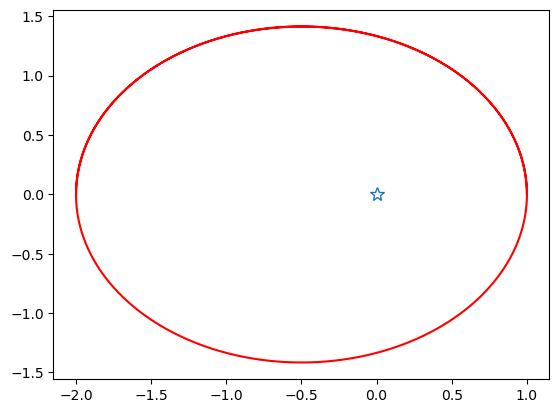

In [3]:
plt.plot(xt,yt,'r-')
plt.plot(0,0,'*',mfc='w',ms=10)
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [4]:
ms = 1e6
mp = 1
G = 3 * 1e-6
dt = .001
iterations = 6800

#initial conditions
r = np.array([1, 0])
v = np.array([0, 2])

y = np.concatenate((r, v)) 

xt = np.array(y[0])
yt = np.array(y[1])


def KeplerODE(t,y):
    r = y[0:2]
    v = y[2:4]
    
    
    drdt = v
    F = - G * ms * mp / np.linalg.norm(r) ** 3 * r
    a = F/mp
    dvdt = a
    
    
    return np.concatenate((drdt,dvdt))

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.919e-04 ...  9.994e+00  1.000e+01]
        y: [[ 1.000e+00  1.000e+00 ... -2.000e+00 -2.000e+00]
            [ 0.000e+00  7.839e-04 ...  2.175e-03 -3.513e-03]
            [ 0.000e+00 -1.176e-03 ... -1.631e-03  2.635e-03]
            [ 2.000e+00  2.000e+00 ... -1.000e+00 -1.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 6014
     njev: 0
      nlu: 0


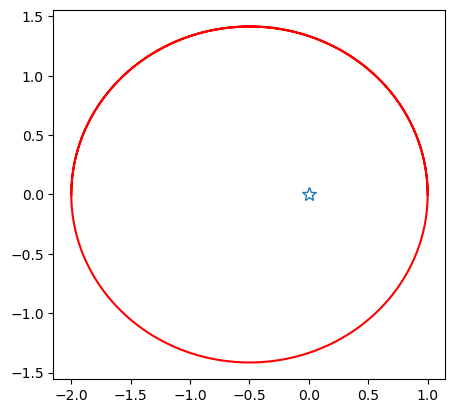

In [5]:
from scipy.integrate import solve_ivp


#initial conditions
r = np.array([1, 0])
v = np.array([0, 2])


y = np.concatenate((r,v)) # set initial conditions
sol = solve_ivp(KeplerODE,[0,tMax],y,method='RK45',max_step=0.01)

print(sol)
plt.figure()
plt.plot(sol.y[0,:],sol.y[1,:],'r-')
plt.plot(0,0,'*',mfc='w',ms=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
def KeplerODE2(y,t):
    return KeplerODE(t,y)

from scipy.integrate import odeint

#initial conditions
r = np.array([1, 0])
v = np.array([0, 2])

y0 = np.concatenate((r,v))
t = np.arange(0.0, tMax, dt)
yt_rk = odeint(KeplerODE2, y0, t)

print(yt_rk)
plt.figure()
plt.plot(yt_rk[:,0],yt_rk[:,1])
plt.plot(0,0,'*',mfc='w',ms=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## MARS

In [ ]:
# Constants
G = 6.67430e-20  # Gravitational constant in km^3/kg/s^2
M_EARTH = 5.97219e24  # Mass of Earth in kg
R_EARTH = 6371  # Radius of Earth in km
R_INITIAL = 300  # Initial orbit radius in km
R_FINAL = 600  # Final orbit radius in km

# Function to calculate orbital velocity
def orbital_velocity(radius):
    return np.sqrt(G * M_EARTH / radius)

# Function to calculate the orbital period
def orbital_period(radius):
    return 2 * np.pi * np.sqrt(radius**3 / (G * M_EARTH))

In [ ]:
pip install pyrigee

In [ ]:
# Create a body. Give it a name, mass, radius, and display color
from pyrigee import *
body = Body("Earth", 5.9722e24, 6378, "cornflowerblue")

# Create a craft. Give it a name and a display color
craft = Craft("Space Shuttle", "white")

# Create an orbit by defining its apogee, perigee, and inclination, respectively
orbit = Orbit(400, 400, 0)

# Create a new orbit plotter to plot a body and orbits around it
p = OrbitPlotter(body)

# Plot a craft following a particular orbit using the plot function (this can be done many times)
p.plot(orbit, craft)

# Use visualize() when you're ready to see the result
p.visualize()

In [ ]:
from pyrigee import *

body = Body("Earth", 5.9722e24, 6378, "cornflowerblue")
craft = Craft("Satellite", "lime")

# Create an initial orbit to start at
initial_orbit = Orbit(400, 400, 0)

# Create a target orbit to maneuver to
target_orbit = Orbit(40000, 40000, 0)

# Create a maneuver object by passing the target orbit and color of manuever
maneuver = Maneuver(target_orbit, "firebrick")

p = OrbitPlotter(body)

# Pass maneuver to the plot function
p.plot(initial_orbit, craft, maneuver)

p.visualize()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Function to calculate spacecraft position in orbit
def spacecraft_position(radius, time):
    omega = 2 * np.pi / orbital_period(radius)
    x = radius * np.cos(omega * time)
    y = radius * np.sin(omega * time)
    return x, y

# Function to update the animation
def update(frame):
    ax.clear()

    # Plot Earth
    earth = plt.Circle((0, 0), R_EARTH, color='blue', alpha=0.5)
    ax.add_patch(earth)

    # Plot initial orbit
    initial_orbit = plt.Circle((0, 0), R_INITIAL, fill=False, color='cadetblue', linestyle='dashed')
    ax.add_patch(initial_orbit)

    # Plot final orbit
    final_orbit = plt.Circle((0, 0), R_FINAL, fill=False, color='red', linestyle='dashed')
    ax.add_patch(final_orbit)

    # Plot spacecraft position
    x, y = spacecraft_position(R_INITIAL, frame)
    spacecraft = plt.Circle((x, y), 10, color='black')
    ax.add_patch(spacecraft)

    ax.set_xlim(-700, 700)
    ax.set_ylim(-700, 700)
    ax.set_aspect('equal')
    ax.set_title(f'Time: {frame:.1f} seconds')

# Create a figure and axis
fig, ax = plt.subplots()

# Set up the animation
animation = FuncAnimation(fig, update, frames=np.linspace(0, orbital_period(R_INITIAL), 100), interval=50)

# Show the animation
plt.show()

In [ ]:
mass = 1e6
G = 3 * 1e-6
dt = .001
tMax = 10
iterations = int(tMax/dt)

x = 1 
y = 0
vx = 0
vy = 2

#initialize
xt = np.array([x])
yt = np.array([y])


for i in range(0,iterations+1):
    r = np.sqrt(x**2 + y**2)
    
    vx = vx + (- G * mass * x / (r**3) * dt)
    vy = vy + (- G * mass * y / (r**3) * dt)
    
    x = x + vx * dt
    y = y + vy * dt

    xt = np.append(xt, x)
    yt = np.append(yt, y)

In [ ]:
plt.plot(xt,yt,'r-')
plt.plot(0,0,'*',mfc='w',ms=10)
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [1]:
import numpy as np
import matplotlib as mpl
mpl.use('pdf')
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation

#### Finding the Period
 
The approximation to a circle when it comes to Hohmann transfers still brings us to a point where we get an extremely close value for the time needed when compared to the elliptical orbits. 

1:  a = r1 + r2 / 2
Kepler's Third Law: p^2 = a^3
T = p/2

Using V = sqrt(GM/r) and Conservation of Energy in the case of angular momentum...

Va = r1/r2 * Vp
Vp = sqrt(2GMs(r2/r2 + r1))

Finding change in V (delV)
delV1 = sqrt(GMs/r1)(sqrt(2r2/(r1+r2))-1)
delV2 = sqrt(GMs/r2)(1-sqrt(2r1/(r1+r2)))

To find Theta (angle offset)
T/Pm = (180-theta)/360
For Mars --> theta = 44


In [2]:
theta_follow = 44 #degrees 

# Radii in AU
Earth = plt.Circle((0,0), radius= 1.0,fill=False,color='cadetblue')
Mars = plt.Circle((0,0), radius= 1.52,fill=False,color='darkred')

E = plt.Circle((0.0, 0.0),radius=0.04,fill=True,color='cadetblue')
M = plt.Circle((0.0, 0.0),radius=0.03,fill=True,color='darkred')
S = plt.Circle((0.0, 0.0),radius=0.01,fill=True,color='purple')

In [3]:
def setCenters():
    E.center = (0.0,0.0)
    ax.add_patch(E)
    M.center = (0.0,0.0)
    ax.add_patch(M)
    S.center = (0.0,0.0)
    ax.add_patch(S)
    return E,M,S

In [4]:
#Writing Animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=60, metadata=dict(artist='Me'), bitrate=1800)

Period = 516.
x_H_1 = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period*75)))*np.cos((2*np.pi/Period*75))
y_H_1 = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period*75)))*np.sin((2*np.pi/Period*75))
x_H_2 = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period*150)))*np.cos((2*np.pi/Period*150))
y_H_2 = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period*150)))*np.sin((2*np.pi/Period*150))
x_H_3 = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period*200)))*np.cos((2*np.pi/Period*200))
y_H_3 = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period*200)))*np.sin((2*np.pi/Period*200))
x_H_4 = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period*250)))*np.cos((2*np.pi/Period*250))
y_H_4 = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period*250)))*np.sin((2*np.pi/Period*250))

In [5]:
def animate(iteration):
    # Earth
    # Semi Major Axis = 1 AU
    # Orbital Period around the Earth = 365.2 days
    x_E, y_E = E.center
    x_E = np.cos((2*np.pi/365.2)*iteration)
    y_E = np.sin((2*np.pi/365.2)*iteration)
    E.center = (x_E, y_E)
    
    # Mars
    # Semi Major Axis = 1.52 AU 
    # Orbital Period around the Sun = 686.98 days
    x_M, y_M = M.center
    x_M = 1.52*np.cos((2*np.pi/686.98)*iteration+(np.pi*theta_follow/180.))
    y_M = 1.52*np.sin((2*np.pi/686.98)*iteration+(np.pi*theta_follow/180.))
    M.center = (x_M,y_M)

    #Transfer
    Period = 516.0
    x_H = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period)*iteration))*np.cos((2*np.pi/Period)*iteration)
    y_H = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period)*iteration))*np.sin((2*np.pi/Period)*iteration)
    S.center = (x_H,y_H)
    return E,M,S


In [6]:
def orbit_path(iteration):

    #Transfer
    Period = 516.0
    x_H = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period)*iteration))*np.cos((2*np.pi/Period)*iteration)
    y_H = 1.26*(1. - 0.21**2)/(1. + 0.21*np.cos((2*np.pi/Period)*iteration))*np.sin((2*np.pi/Period)*iteration)
    return x_H,y_H


In [7]:
x_H_vals = []
y_H_vals = []
for i in range(75,251):
    x_H_vals.append(orbit_path(i)[0])
    y_H_vals.append(orbit_path(i)[1])  

In [8]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

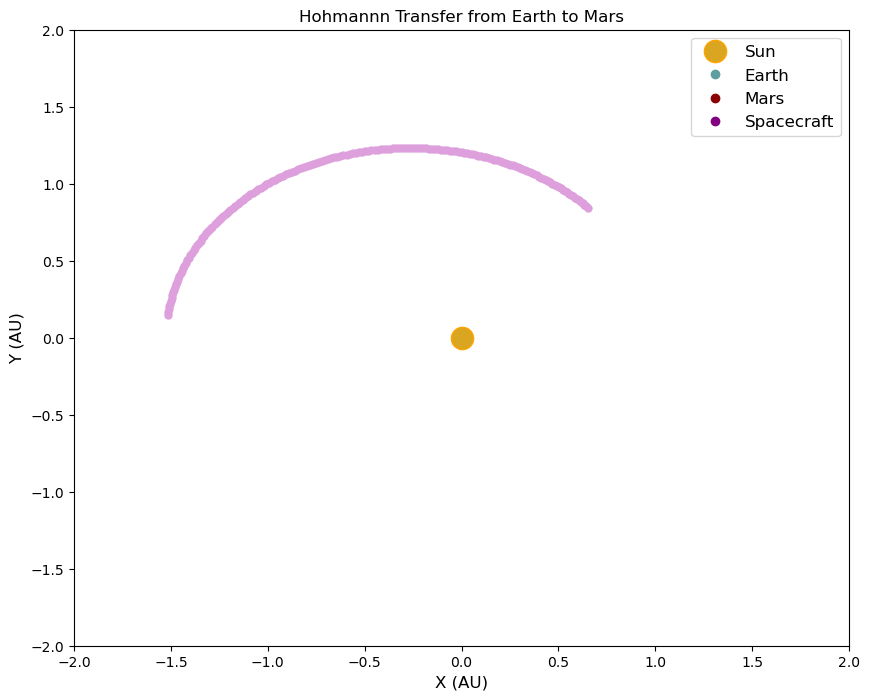

In [9]:
fig, ax = plt.subplots(figsize=(10,8))

#Initializing objects
ax.plot(0,0,color='orange',marker='o',linestyle='',markersize=16,markerfacecolor='goldenrod',label='Sun')
ax.plot([],[],color='cadetblue',linestyle='',marker='o',label='Earth')
ax.plot([],[],color='darkred',linestyle='',marker='o',label='Mars')
ax.plot([],[],color='purple',linestyle='',marker='o',label='Spacecraft')

#Plotting 'path' of Transfer
for i in range(0,len(x_H_vals)):
    ax.plot(x_H_vals[i],y_H_vals[i],color='plum',marker ='o',markersize = 5)
    
#Adding Earth and Mars (Planets)
ax.add_patch(E)
ax.add_patch(M)

    
#Formatting Plot
ax.set_xlabel('X (AU)',fontsize=12)
ax.set_ylabel('Y (AU)',fontsize=12)
plt.xlim(-2,2)
plt.ylim(-2,2)
ax.set_title("Hohmannn Transfer from Earth to Mars")
ax.legend(loc='best',fontsize=12)

#Writing, Saving & Displaying 
plt.show()
anim = animation.FuncAnimation(fig, animate,init_func=setCenters,frames=260,interval=40,blit=True)
plt.savefig('Hohmann.pdf')
anim.save('Hohmann_Mars.mp4', writer=writer)